In [ ]:
#OlivierDT: added numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_json("all_data.json")
df.head()

,Available as of,Available date,Construction year,Building condition,Street frontage width,Number of frontages,Surroundings type,Virtual visit,Living area,Living room surface,...,Current monthly revenue,Percentage rented,Venue of the sale,Single session,Terms of visit,Starting price,EPC description,Sea view,Floor,Number of floors
0,After signing the deed,November 12 2022 - 12:00 AM,1899.0,Good,5 m,2.0,Isolated,Link to the virtual visit,122 m² square meters,14 m² square meters,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,After signing the deed,September 15 2022 - 12:00 AM,1941.0,Good,4.44 m,2.0,Urban,NaN,119 m² square meters,32 m² square meters,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,After signing the deed,NaN,1961.0,To renovate,7 m,3.0,"Living area (residential, urban or rural)",NaN,200 m² square meters,45 m² square meters,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,After signing the deed,NaN,1989.0,As new,12 m,4.0,Landscape,NaN,404 m² square meters,55 m² square meters,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Depending on the tenant,NaN,1924.0,To be done up,7 m,2.0,NaN,Link to the virtual visit,350 m² square meters,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
list(df.columns)

['Available as of',
 'Available date',
 'Construction year',
 'Building condition',
 'Street frontage width',
 'Number of frontages',
 'Surroundings type',
 'Virtual visit',
 'Living area',
 'Living room surface',
 'Dining room',
 'Kitchen type',
 'Kitchen surface',
 'Bedrooms',
 'Bedroom 1 surface',
 'Bedroom 2 surface',
 'Bathrooms',
 'Shower rooms',
 'Toilets',
 'Office surface',
 'Office',
 'Basement',
 'Attic',
 'Furnished',
 'Surface of the plot',
 'Width of the lot on the street',
 'Connection to sewer network',
 'Gas, water &amp; electricity',
 'Garden surface',
 'Terrace surface',
 'Elevator',
 'Accessible for disabled people',
 'TV cable',
 'Swimming pool',
 'Primary energy consumption',
 'Energy class',
 '',
 'Reference number of the EPC report',
 'CO₂ emission',
 'Yearly theoretical total energy consumption',
 'Heating type',
 'Double glazing',
 'Planning permission obtained',
 'Total ground floor buildable',
 'Subdivision permit',
 'Possible priority purchase right',
 'Pro

In [ ]:
#Create a new dataframe with selected data

df = df[['url',
        'Living area',
         'Bedrooms',
         'locality',
         'Surface of the plot',
         'Garden',
         'Garden surface',
         'Kitchen type',
         'Swimming pool',
         'Furnished',
         'How many fireplaces?',
         'Terrace',
         'Terrace surface',
         'Number of frontages',
         'Building condition', 
         'Price',
         'type_of_property',
         'subtype_of_property',
         'Elevator',
         'Floor']]



In [ ]:
df.head()
print("Rows     : ", df.shape[0])
print("Columns  : ", df.shape[1])
print("\nFeatures : \n", df.columns.tolist())
print("\nMissing values :  ", df.isnull().sum().values.sum())
print("\nUnique values :  \n", df.nunique())

print("df", df.shape)

Rows     :  18479
Columns  :  20

Features : 
 ['url', 'Living area', 'Bedrooms', 'locality', 'Surface of the plot', 'Garden', 'Garden surface', 'Kitchen type', 'Swimming pool', 'Furnished', 'How many fireplaces?', 'Terrace', 'Terrace surface', 'Number of frontages', 'Building condition', 'Price', 'type_of_property', 'subtype_of_property', 'Elevator', 'Floor']

Missing values :   131751

Unique values :  
 url                     17373
Living area               670
Bedrooms                   26
locality                 1860
Surface of the plot      2219
Garden                      1
Garden surface            903
Kitchen type                8
Swimming pool               2
Furnished                   2
How many fireplaces?        8
Terrace                     1
Terrace surface           177
Number of frontages         7
Building condition          6
Price                    1842
type_of_property            3
subtype_of_property        23
Elevator                    2
Floor               

In [ ]:
#create ID in the new datframe (from the URL)
df["id"] = df["url"].str.split("/").str[9]
df["id"] = df["id"].apply(lambda x: str(x).split('?')).str[0]
#print(df["id"])
print(df["id"].nunique())
df["id"].count()


17373


18479

In [ ]:
#info point
def give_info(data):

    info = (pd.concat([data.dtypes,
                   data.nunique(),
                   data.isnull().sum()],axis=1))
    info = info.rename(columns={0:'dtypes',
                            1:'nuniques', # amount of possible values , 'cardinality' of variable
                            2:'isna_sum'}) # amount of null values

    return info

give_info(df)

,dtypes,nuniques,isna_sum
url,object,17373,0
Living area,object,670,1374
Bedrooms,float64,26,402
locality,object,1860,0
Surface of the plot,object,2219,9508
Garden,object,1,16266
Garden surface,object,903,14121
Kitchen type,object,8,4671
Swimming pool,object,2,10524
Furnished,object,2,4322


In [ ]:
#Remove duplicates ID
df = df.drop_duplicates(subset="id")
df.shape
give_info(df)

,dtypes,nuniques,isna_sum
url,object,17373,0
Living area,object,670,1311
Bedrooms,float64,26,373
locality,object,1860,0
Surface of the plot,object,2219,8755
Garden,object,1,15265
Garden surface,object,903,13204
Kitchen type,object,8,4424
Swimming pool,object,2,9984
Furnished,object,2,4074


In [ ]:
#OlivierDT: added url field back to df
df = df[['id','url',
         'Living area',
         'Bedrooms',
         'locality',
         'Surface of the plot',
         'Garden',
         'Garden surface',
         'Kitchen type',
         'Swimming pool',
         'Furnished',
         'How many fireplaces?',
         'Terrace',
         'Terrace surface',
         'Number of frontages',
         'Building condition', 
         'Price',
         'type_of_property',
         'subtype_of_property',
         'Elevator',
         'Floor']]

give_info(df)

,dtypes,nuniques,isna_sum
id,object,17373,0
url,object,17373,0
Living area,object,670,1311
Bedrooms,float64,26,373
locality,object,1860,0
Surface of the plot,object,2219,8755
Garden,object,1,15265
Garden surface,object,903,13204
Kitchen type,object,8,4424
Swimming pool,object,2,9984


In [ ]:
df.shape


(17373, 21)

In [ ]:
df.columns = df.columns.str.replace(' ','_') #proprer call columns
df.columns= df.columns.str.lower() #lower case columns names
df.columns= df.columns.str.replace('?','')
list(df.columns)

/tmp/ipykernel_2558/2228188739.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns= df.columns.str.replace('?','')


['id',
 'url',
 'living_area',
 'bedrooms',
 'locality',
 'surface_of_the_plot',
 'garden',
 'garden_surface',
 'kitchen_type',
 'swimming_pool',
 'furnished',
 'how_many_fireplaces',
 'terrace',
 'terrace_surface',
 'number_of_frontages',
 'building_condition',
 'price',
 'type_of_property',
 'subtype_of_property',
 'elevator',
 'floor']

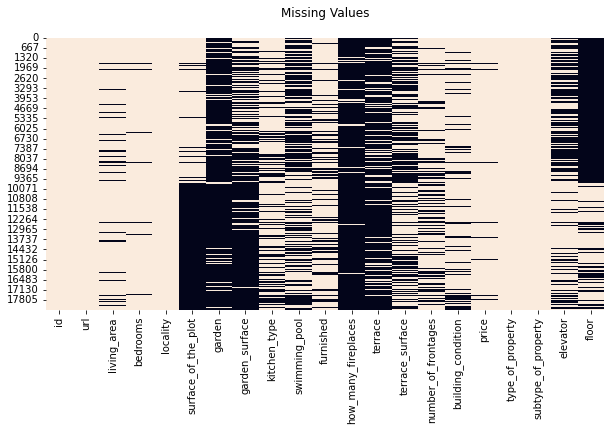

In [ ]:
plt.figure(figsize=(10, 5))
plt.title('Missing Values\n')
sns.heatmap(df.notnull(), cbar=False)
plt.show()
#black lines are missing values

In [ ]:
#OlivierDT: modified second line of code to convert object to int64 - NB: pd.to_numeric(s, errors='coerce') will coerce non-numeric junk to NaNs
df["living_area_sqm"] = df["living_area"].str.split(" ").str[0]
df["living_area_sqm"] = pd.to_numeric(df["living_area_sqm"]).convert_dtypes()
#df["living_area_sqm"].sort_values()
print(df['living_area_sqm'].head())
print(df['living_area_sqm'].describe())


0    122
1    119
2    200
3    404
4    350
Name: living_area_sqm, dtype: Int64
count    16062.000000
mean       182.760926
std        535.841917
min         15.000000
25%         95.000000
50%        140.000000
75%        206.000000
max      63075.000000
Name: living_area_sqm, dtype: float64


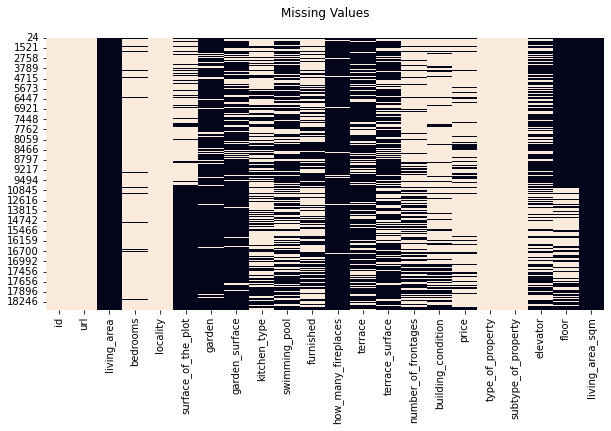

,dtypes,nuniques,isna_sum
id,object,1311,0
url,object,1311,0
living_area,object,0,1311
bedrooms,float64,15,92
locality,object,489,0
surface_of_the_plot,object,450,727
garden,object,1,1174
garden_surface,object,155,1073
kitchen_type,object,8,486
swimming_pool,object,2,828


In [ ]:
#scout missing values for living_area w.o value.
dfnullsqm = df[df["living_area_sqm"].isnull()]

plt.figure(figsize=(10, 5))
plt.title('Missing Values\n')
sns.heatmap(dfnullsqm.notnull(), cbar=False)
plt.show()
give_info(dfnullsqm)

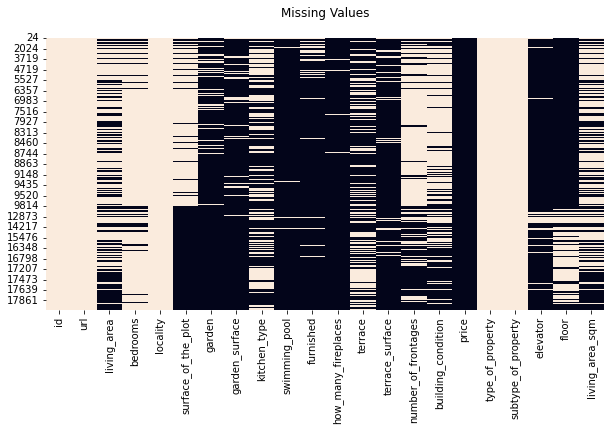

,dtypes,nuniques,isna_sum
id,object,518,0
url,object,518,0
living_area,object,156,232
bedrooms,float64,10,59
locality,object,280,0
surface_of_the_plot,object,231,245
garden,object,1,477
garden_surface,object,32,477
kitchen_type,object,5,293
swimming_pool,object,2,508


In [ ]:
#scout missing values for price w.o value.
dfnullprice = df[df["price"].isnull()]

plt.figure(figsize=(10, 5))
plt.title('Missing Values\n')
sns.heatmap(dfnullprice.notnull(), cbar=False)
plt.show()
give_info(dfnullprice)

# Price

In [ ]:
#Remove rows where price data are missing
df = df.dropna(subset="price")
give_info(df)
df.shape

(16855, 22)

In [ ]:
df.price

0        Make an offer starting from € 159,000 Make an ...
1                                       € 345,000 345000 €
2                                       € 895,000 895000 €
3                                       € 570,000 570000 €
4                                       € 800,000 800000 €
                               ...                        
18474                                   € 329,000 329000 €
18475                                   € 329,500 329500 €
18476                                   € 329,500 329500 €
18477                                   € 329,750 329750 €
18478                                   € 329,900 329900 €
Name: price, Length: 16855, dtype: object

In [ ]:
#OlivierDT: I think we can drop this one
df["price"].unique()

array(['Make an offer starting from € 159,000 Make an offer starting from 159000 €',
       '€ 345,000 345000 €', '€ 895,000 895000 €', ...,
       '€ 304,500 304500 €', '€ 327,250 327250 €', '€ 329,750 329750 €'],
      dtype=object)

In [ ]:
#OlivierDT: I think we can drop this one too
df["price"].value_counts()

€ 299,000 299000 €                                                            256
€ 295,000 295000 €                                                            209
€ 395,000 395000 €                                                            207
€ 249,000 249000 €                                                            206
€ 199,000 199000 €                                                            183
                                                                             ... 
Make an offer starting from € 334,000 Make an offer starting from 334000 €      1
€ 235,200 235200 €                                                              1
Make an offer starting from € 197,000 Make an offer starting from 197000 €      1
€ 229,900 229900 €                                                              1
€ 329,750 329750 €                                                              1
Name: price, Length: 1842, dtype: int64

In [ ]:
print(df['price'].describe())
print(df['price'].value_counts())
print(df['price'].loc[df['price'].str.contains('offer')].value_counts())

count                  16855
unique                  1842
top       € 299,000 299000 €
freq                     256
Name: price, dtype: object
€ 299,000 299000 €                                                            256
€ 295,000 295000 €                                                            209
€ 395,000 395000 €                                                            207
€ 249,000 249000 €                                                            206
€ 199,000 199000 €                                                            183
                                                                             ... 
Make an offer starting from € 334,000 Make an offer starting from 334000 €      1
€ 235,200 235200 €                                                              1
Make an offer starting from € 197,000 Make an offer starting from 197000 €      1
€ 229,900 229900 €                                                              1
€ 329,750 329750 €                   

In [ ]:
#OlivierDT: based on the values printed, we noticed the price field is populated with 
# either a price in € (displayed with and without formatting) or a statement pertaining to an offer, indicating a minimum offer price.
# Hence we decided to add a column 'isOffer' to be able to process the information to retrieve the price information.

df['isOffer'] = np.where(df['price'].str.contains('offer'), 1, 0)
print(df['isOffer'].head())
print(df['isOffer'].value_counts())


0    1
1    0
2    0
3    0
4    0
Name: isOffer, dtype: int64
0    15594
1     1261
Name: isOffer, dtype: int64


In [ ]:
#OlivierDT: whether the price is given as a price in € or as a statement indicating a minimum offer price, the price information is the for last in the split,so you can use index -2 to retrieve it
df["price_clean"] = df["price"].str.split(" ").str[-2]
#df['price_clean'] = np.where(df['isOffer'] == 1, df['price'].str.split(" ").str[-2], df['price'].str.split(" ").str[-2])
#df['price_clean'] = np.where(df['isOffer'] == 1, df['price'].str.split(" ").str[-2], df['price'].str.split(" ").str[2])
print(df['price_clean'])

0        159000
1        345000
2        895000
3        570000
4        800000
          ...  
18474    329000
18475    329500
18476    329500
18477    329750
18478    329900
Name: price_clean, Length: 16855, dtype: object


In [ ]:
#OlivierDT: changing price datatype
df['price_clean'] = pd.to_numeric(df["price_clean"]).convert_dtypes()
print(df['price_clean'].head())
print(df['price_clean'].value_counts())

0    159000
1    345000
2    895000
3    570000
4    800000
Name: price_clean, dtype: Int64
299000    277
249000    240
295000    227
395000    226
199000    222
         ... 
531500      1
156000      1
229950      1
364500      1
329750      1
Name: price_clean, Length: 1591, dtype: Int64


# OlivierDT columns to clean

Columns: 'building_condition', 'price', type_of_property', 'subtype_of_property', 'elevator', 'floor', 'living_area_sqm'

## Building condition

In [ ]:
print(df['building_condition'].describe())
print(df['building_condition'].isnull().sum())
print(df['building_condition'].value_counts())

count     13933
unique        6
top        Good
freq       5188
Name: building_condition, dtype: object
Good              5188
As new            4846
To be done up     1541
To renovate       1410
Just renovated     885
To restore          63
Name: building_condition, dtype: int64


In [ ]:
print(df[['type_of_property','subtype_of_property']].loc[df['building_condition'].isna()].value_counts())

type_of_property  subtype_of_property 
apartment         apartment               1479
house             house                    836
                  villa                    133
apartment         penthouse                 85
                  duplex                    70
other             ground-floor              48
                  flat-studio               45
                  apartment-block           44
                  mixed-use-building        42
                  service-flat              36
                  mansion                   22
                  exceptional-property      17
                  country-cottage           12
apartment         loft                      11
house             town-house                 8
                  bungalow                   8
other             castle                     8
house             chalet                     5
apartment         triplex                    5
house             farmhouse                  3
apartment         kot

## Price

See above

## Type of property

Three categories: 'house', 'apartment', 'other'.

16855 records, so all rows are populated.

Questions: What comes under 'other'? Why? When was it done?

In [ ]:
print(df['type_of_property'].describe())
print(df['type_of_property'].value_counts())

count     16855
unique        3
top       house
freq       7636
Name: type_of_property, dtype: object
house        7636
apartment    7017
other        2202
Name: type_of_property, dtype: int64


## Subtype of property

Twenty-three categories:

16855 records, so all rows are populated.

In [ ]:
print(df['subtype_of_property'].describe())
print(df['subtype_of_property'].value_counts())

count     16855
unique       23
top       house
freq       6326
Name: subtype_of_property, dtype: object
house                   6326
apartment               5894
villa                   1080
duplex                   480
penthouse                471
apartment-block          402
ground-floor             390
mixed-use-building       333
flat-studio              280
exceptional-property     227
service-flat             211
mansion                  197
loft                     103
town-house               102
country-cottage          101
bungalow                  73
triplex                   52
farmhouse                 38
castle                    29
chalet                    17
kot                       17
manor-house               16
other-property            16
Name: subtype_of_property, dtype: int64


## Elevator

It is expected that this field will be empty for houses and populated for some apartments (hence both categories 'apartment' and 'other' should be somewhat populated).

The higher the floor the apartment is located on, the more important the presence of a working elevator will be.

In [ ]:
print(df['elevator'].describe())
print(df['elevator'].value_counts())

count     9301
unique       2
top        Yes
freq      5343
Name: elevator, dtype: object
Yes    5343
No     3958
Name: elevator, dtype: int64


In [ ]:
#OlivierDT: add "hasElevator" column with 1 denoting the presence of an elevator and 0 denoting its absence.

df['hasElevator'] = np.where(df['elevator'] == 'Yes', 1, 0)
print(df['hasElevator'].head())
print(df['hasElevator'].value_counts())

0    0
1    0
2    0
3    0
4    0
Name: hasElevator, dtype: int64
0    11512
1     5343
Name: hasElevator, dtype: int64


## Floor

It is expected that this field will be populated for apartments.

It is expected for the floor the apartment is located on to impact the price (e.g. views on surrounding area, ease or difficulty of access, presence or absence of a working elevator).

In [ ]:
print(df['floor'].describe())
print(df['floor'].value_counts())

count    5707.000000
mean        4.240582
std        35.072442
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max       999.000000
Name: floor, dtype: float64
1.0      1656
2.0      1487
3.0      1038
4.0       536
5.0       375
6.0       204
7.0       117
8.0        75
9.0        67
10.0       42
11.0       31
12.0       19
15.0       12
13.0        9
14.0        8
999.0       7
16.0        4
17.0        3
18.0        3
19.0        2
67.0        2
31.0        1
201.0       1
29.0        1
26.0        1
41.0        1
21.0        1
22.0        1
32.0        1
34.0        1
23.0        1
Name: floor, dtype: int64


In [ ]:
#OlivierDT
print(df[['type_of_property','subtype_of_property']].loc[df['floor'].isna()].value_counts())

In [ ]:
# OlivierDT: To manually check on Immoweb (add url back into dataframe)
print(df[df['floor'] == 999])

             id                                                url  \
9665   10141214  https://www.immoweb.be/en/classified/apartment...   
12292   9983897  https://www.immoweb.be/en/classified/apartment...   
12588   9928303  https://www.immoweb.be/en/classified/apartment...   
13324   9970171  https://www.immoweb.be/en/classified/apartment...   
14252   9646691  https://www.immoweb.be/en/classified/apartment...   
17806   9974344  https://www.immoweb.be/en/classified/apartment...   
18192   8385057  https://www.immoweb.be/en/classified/apartment...   

                living_area  bedrooms locality surface_of_the_plot garden  \
9665   277 m² square meters       4.0  ixelles                 NaN    NaN   
12292  255 m² square meters       3.0  ixelles                 NaN    NaN   
12588  240 m² square meters       3.0    uccle                 NaN    NaN   
13324  475 m² square meters       3.0    uccle                 NaN    NaN   
14252  192 m² square meters       2.0    uccle        

Visual check on the 7 outliers with floor = 999 (as there are only 7 it is not too time consuming).
Either penthouse or duplex, it seems these are always on the property's top floor(s).
Advice: include number of floors and use a condition to replace 999 with the related number of floors.
Nice to have: extract additional info from description (e.g. keywords like 'duplex','penthouse', ...)


10141214 "on 5 floors including this urban penthouse on one level"
https://www.immoweb.be/en/classified/apartment/for-sale/ixelles/1050/10141214
9983897 "the duplex is composed as follows:" and number of floors is 3
https://www.immoweb.be/en/classified/apartment/for-sale/ixelles/1050/9983897
9928303 "Penthouse 3 bedrooms", number of floors 2. From the pictures, you can infer it is located on 1st and 2nd floors.
https://www.immoweb.be/en/classified/apartment/for-sale/uccle/1180/9928303
9970171 Number of floors 	3 From reading the description it appears this apartment is on one floor only. From the pictures, you can infer it is the top floor (trees with pinkish leaves on terrace picture and on picture of the whole building)
https://www.immoweb.be/en/classified/apartment/for-sale/uccle/1180/9970171
9646691 is a "duplex on the top floors", the total number of floors is 4, hence this apartment is located on the 3rd and 4th floors.
https://www.immoweb.be/en/classified/apartment/for-sale/uccle/1180/9646691
9974344 is a "Splendide penthouse du projet ASTERIA de 179m2 avec une terrasse de 36m2 (orientée Sud) et un séjour de 70m2 au 2ième étage d'un petit immeuble."
https://www.immoweb.be/en/classified/apartment/for-sale/uccle/1180/9974344
8385057 is "Located on the 9th and last floor"
https://www.immoweb.be/en/classified/apartment/for-sale/ixelles/1050/8385057


## Living area surface (sqm)

In [ ]:
print(df['living_area_sqm'].describe())
print(df['living_area_sqm'].value_counts())

count    15776.000000
mean       183.359407
std        540.547522
min         15.000000
25%         95.000000
50%        140.000000
75%        207.000000
max      63075.000000
Name: living_area_sqm, dtype: float64
100      308
150      284
90       268
120      239
110      233
        ... 
63075      1
1617       1
1700       1
1200       1
668        1
Name: living_area_sqm, Length: 669, dtype: Int64
